# LUNA experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 30 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate toy data

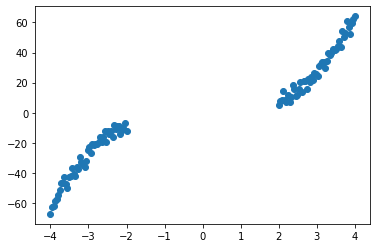

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 30
reg_grid = [0., 100., 300., 600., 1000., 3000., 6000.]
div_grid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 2000
max_iteration_luna = 2000

## Fit with NLM and LUNA

In [7]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8594.087437137905; gradient mag: 19676.38037950352
Iteration 100 loss 85.10518158952294; gradient mag: 68.75621245276214
Iteration 200 loss 20.253158486857757; gradient mag: 37.247823037216406
Iteration 300 loss 9.155670572964306; gradient mag: 5.287123955625457
Iteration 400 loss 8.316473243521031; gradient mag: 2.5900312574523086
Iteration 500 loss 8.145875699726048; gradient mag: 4.176580354493389
Iteration 600 loss 8.077696712548855; gradient mag: 1.6821608581883507
Iteration 700 loss 8.058291552961103; gradient mag: 1.2197082763471032
Iteration 800 loss 8.022989408101349; gradient mag: 2.7477579739632874
Iteration 900 loss 8.01411785303659; gradient mag: 3.053993999584066
Iteration 1000 loss 8.005518174582837; gradient mag: 1.450434763554581
Iteration 1100 loss 7.997898984008861; gradient mag: 3.50079133373076
Iteration 1200 loss 7.990364046062387; gradient mag: 3.097970523929423
Iteration 1300 loss 7.9830623612747305; gr

Iteration 1000 loss 243.10243019916751; gradient mag: 26.325521258089598
Iteration 1100 loss 215.1608051524468; gradient mag: 23.859707456122198
Iteration 1200 loss 192.78478321772815; gradient mag: 22.172548161335826
Iteration 1300 loss 174.81614750717904; gradient mag: 18.80266505918554
Iteration 1400 loss 160.44121000412798; gradient mag: 17.22077383526601
Iteration 1500 loss 148.94395640042853; gradient mag: 16.821568575418215
Iteration 1600 loss 139.76152893728994; gradient mag: 15.441342734955125
Iteration 1700 loss 132.52443337245964; gradient mag: 13.142517502419498
Iteration 1800 loss 126.79772797711196; gradient mag: 12.127663338227638
Iteration 1900 loss 122.34706605367744; gradient mag: 11.793938201139774

Training took 0:00:51 (h:mm:ss)

===== NLM [ Regularization: 6000.0 ]  =====

Iteration 0 loss 14978.83443615908; gradient mag: 19688.624649712307
Iteration 100 loss 2992.3266070457785; gradient mag: 184.905640023522
Iteration 200 loss 1735.8595958677918; gradient mag: 12

In [8]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 30 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 13025.581579488497; gradient mag: 7359.437263505383
Iteration 100 loss 111.4362165314245; gradient mag: 27.18422451184533
Iteration 200 loss 49.84738728747164; gradient mag: 17.45695433431472
Iteration 300 loss 21.268833521727736; gradient mag: 9.219332530912743
Iteration 400 loss 13.692374919258256; gradient mag: 4.297893142839687
Iteration 500 loss 11.868057808751777; gradient mag: 2.387776364954008
Iteration 600 loss 11.070948995279828; gradient mag: 1.6212415013280097
Iteration 700 loss 10.509513493127525; gradient mag: 1.4698841594550327
Iteration 800 loss 10.0279713333404; gradient mag: 1.2880204488188924
Iteration 900 loss 9.618442915375883; gradient mag: 1.201686687046906
Iteration 1000 loss 9.288137653039453; gradient mag: 1.0783310965991129
Iteration 1100 loss 9.028137484584452; gradient mag: 0.9422397548364538
Iteration 1200 loss 8.825399300167682; gradient mag: 1.10

Iteration 600 loss 417.80768304633506; gradient mag: 27.51804691583162
Iteration 700 loss 355.8678022279407; gradient mag: 24.801747440720817
Iteration 800 loss 311.11778262016526; gradient mag: 20.99944732617428
Iteration 900 loss 278.37974992629756; gradient mag: 17.867070216234417
Iteration 1000 loss 254.07311690292232; gradient mag: 15.446294540883889
Iteration 1100 loss 235.81128368805244; gradient mag: 13.544438782664908
Iteration 1200 loss 222.00720696532656; gradient mag: 12.943275496798535
Iteration 1300 loss 211.41862926932131; gradient mag: 10.698525085268766
Iteration 1400 loss 203.24348165389677; gradient mag: 10.387632961235346
Iteration 1500 loss 196.85672123299096; gradient mag: 8.777400586512718
Iteration 1600 loss 191.88073622186187; gradient mag: 9.28833384998574
Iteration 1700 loss 187.92962373213487; gradient mag: 6.692099571891044
Iteration 1800 loss 184.83832670068142; gradient mag: 5.764865049506426
Iteration 1900 loss 182.4030061852381; gradient mag: 5.57130958

Iteration 1200 loss 138.6098898536952; gradient mag: 7.001677635017098
Iteration 1300 loss 129.6015041842767; gradient mag: 6.746783008774683
Iteration 1400 loss 121.77322170905457; gradient mag: 6.18598372924646
Iteration 1500 loss 114.79641033906414; gradient mag: 6.112856554732117
Iteration 1600 loss 108.74060964661548; gradient mag: 5.357870047854834
Iteration 1700 loss 103.48031396327742; gradient mag: 5.454569983907805
Iteration 1800 loss 98.73353935084006; gradient mag: 5.196914799002679
Iteration 1900 loss 94.48540234771775; gradient mag: 4.878468052811668

Training took 0:01:17 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 1000.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 14034.089686872723; gradient mag: 7365.534059810346
Iteration 100 loss 749.481394496584; gradient mag: 36.95449375205643
Iteration 200 loss 551.1680876620098; gradient mag: 24.172409318448878
Iteration 300 loss 451.30235779822885; gradient mag: 20.369115497645645
Iteration 400 loss

Iteration 1800 loss 160.72398489050096; gradient mag: 22.008272248132965
Iteration 1900 loss 158.40056688050552; gradient mag: 17.38093858771375

Training took 0:01:23 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 300.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 13418.172484043913; gradient mag: 7368.397023246116
Iteration 100 loss 419.4079841375688; gradient mag: 74.59574464096757
Iteration 200 loss 354.5853927583906; gradient mag: 35.05734314513789
Iteration 300 loss 308.2394393274466; gradient mag: 38.499689432073794
Iteration 400 loss 290.40720269491715; gradient mag: 51.81479993169536
Iteration 500 loss 275.4842875790606; gradient mag: 36.71616752323571
Iteration 600 loss 263.45646618471375; gradient mag: 25.7354675710597
Iteration 700 loss 253.14057205469987; gradient mag: 26.819451212465527
Iteration 800 loss 249.09851124011297; gradient mag: 72.67251585483653
Iteration 900 loss 235.0753126146765; gradient mag: 20.531444710882823
Iteration 1000 loss 

Iteration 200 loss 684.6472158889237; gradient mag: 322.2120510872742
Iteration 300 loss 667.8693356555048; gradient mag: 739.113440383092
Iteration 400 loss 646.7667311385137; gradient mag: 118.5423238454365
Iteration 500 loss 639.5361000210735; gradient mag: 360.3101740870701
Iteration 600 loss 635.3715243128519; gradient mag: 432.8014557061015
Iteration 700 loss 633.0202453314283; gradient mag: 412.5472792812655
Iteration 800 loss 631.1249492696898; gradient mag: 78.50692480007922
Iteration 900 loss 630.9840236051755; gradient mag: 276.01916493907726
Iteration 1000 loss 632.1469484718591; gradient mag: 622.591562266078
Iteration 1100 loss 631.4088870529714; gradient mag: 538.1525022881076
Iteration 1200 loss 630.8279387484589; gradient mag: 446.3459680629577
Iteration 1300 loss 630.3532125790216; gradient mag: 350.67194337358757
Iteration 1400 loss 630.4266564842106; gradient mag: 362.9193617841636
Iteration 1500 loss 630.976211830103; gradient mag: 497.8247130191822
Iteration 1600 

Iteration 900 loss 944.1981117672049; gradient mag: 343.68182108240444
Iteration 1000 loss 918.0522231858536; gradient mag: 604.0597917635348
Iteration 1100 loss 892.1641291618319; gradient mag: 117.75228851899584
Iteration 1200 loss 876.0795133750514; gradient mag: 196.03572206011447
Iteration 1300 loss 864.4628143640085; gradient mag: 112.29932217972677
Iteration 1400 loss 854.4442377458231; gradient mag: 124.84596938677542
Iteration 1500 loss 847.2682373474058; gradient mag: 135.75184124582347
Iteration 1600 loss 841.0376259852962; gradient mag: 231.82235657397675
Iteration 1700 loss 837.026952542057; gradient mag: 164.70474769982317
Iteration 1800 loss 833.0184330725584; gradient mag: 55.443954397905294
Iteration 1900 loss 831.1785165455112; gradient mag: 138.7865609082595

Training took 0:01:43 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 6000.0 ] === [ Diversification: 1000.0 ] =====

Iteration 0 loss 19948.204779652064; gradient mag: 7490.897513096913
Iteration 1

Iteration 1600 loss 5252.546446664534; gradient mag: 378.5025460991375
Iteration 1700 loss 5293.378215347976; gradient mag: 5817.626255369062
Iteration 1800 loss 5238.737637294084; gradient mag: 623.7263907346742
Iteration 1900 loss 5232.792985240945; gradient mag: 1066.55753080462

Training took 0:01:21 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 1000.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 23301.562463908715; gradient mag: 11770.632091100568
Iteration 100 loss 5849.559432821417; gradient mag: 740.9592910122027
Iteration 200 loss 5685.041994223623; gradient mag: 1669.4546337971963
Iteration 300 loss 5640.841659968498; gradient mag: 645.1696296012863
Iteration 400 loss 5611.807520087231; gradient mag: 1995.7113943309125
Iteration 500 loss 5593.593202550352; gradient mag: 2801.2625681941854
Iteration 600 loss 5565.114142074892; gradient mag: 3438.743376754633
Iteration 700 loss 5617.0174888653255; gradient mag: 5995.436440058064
Iteration 800 loss 5

## Plot auxiliary functions after fitting

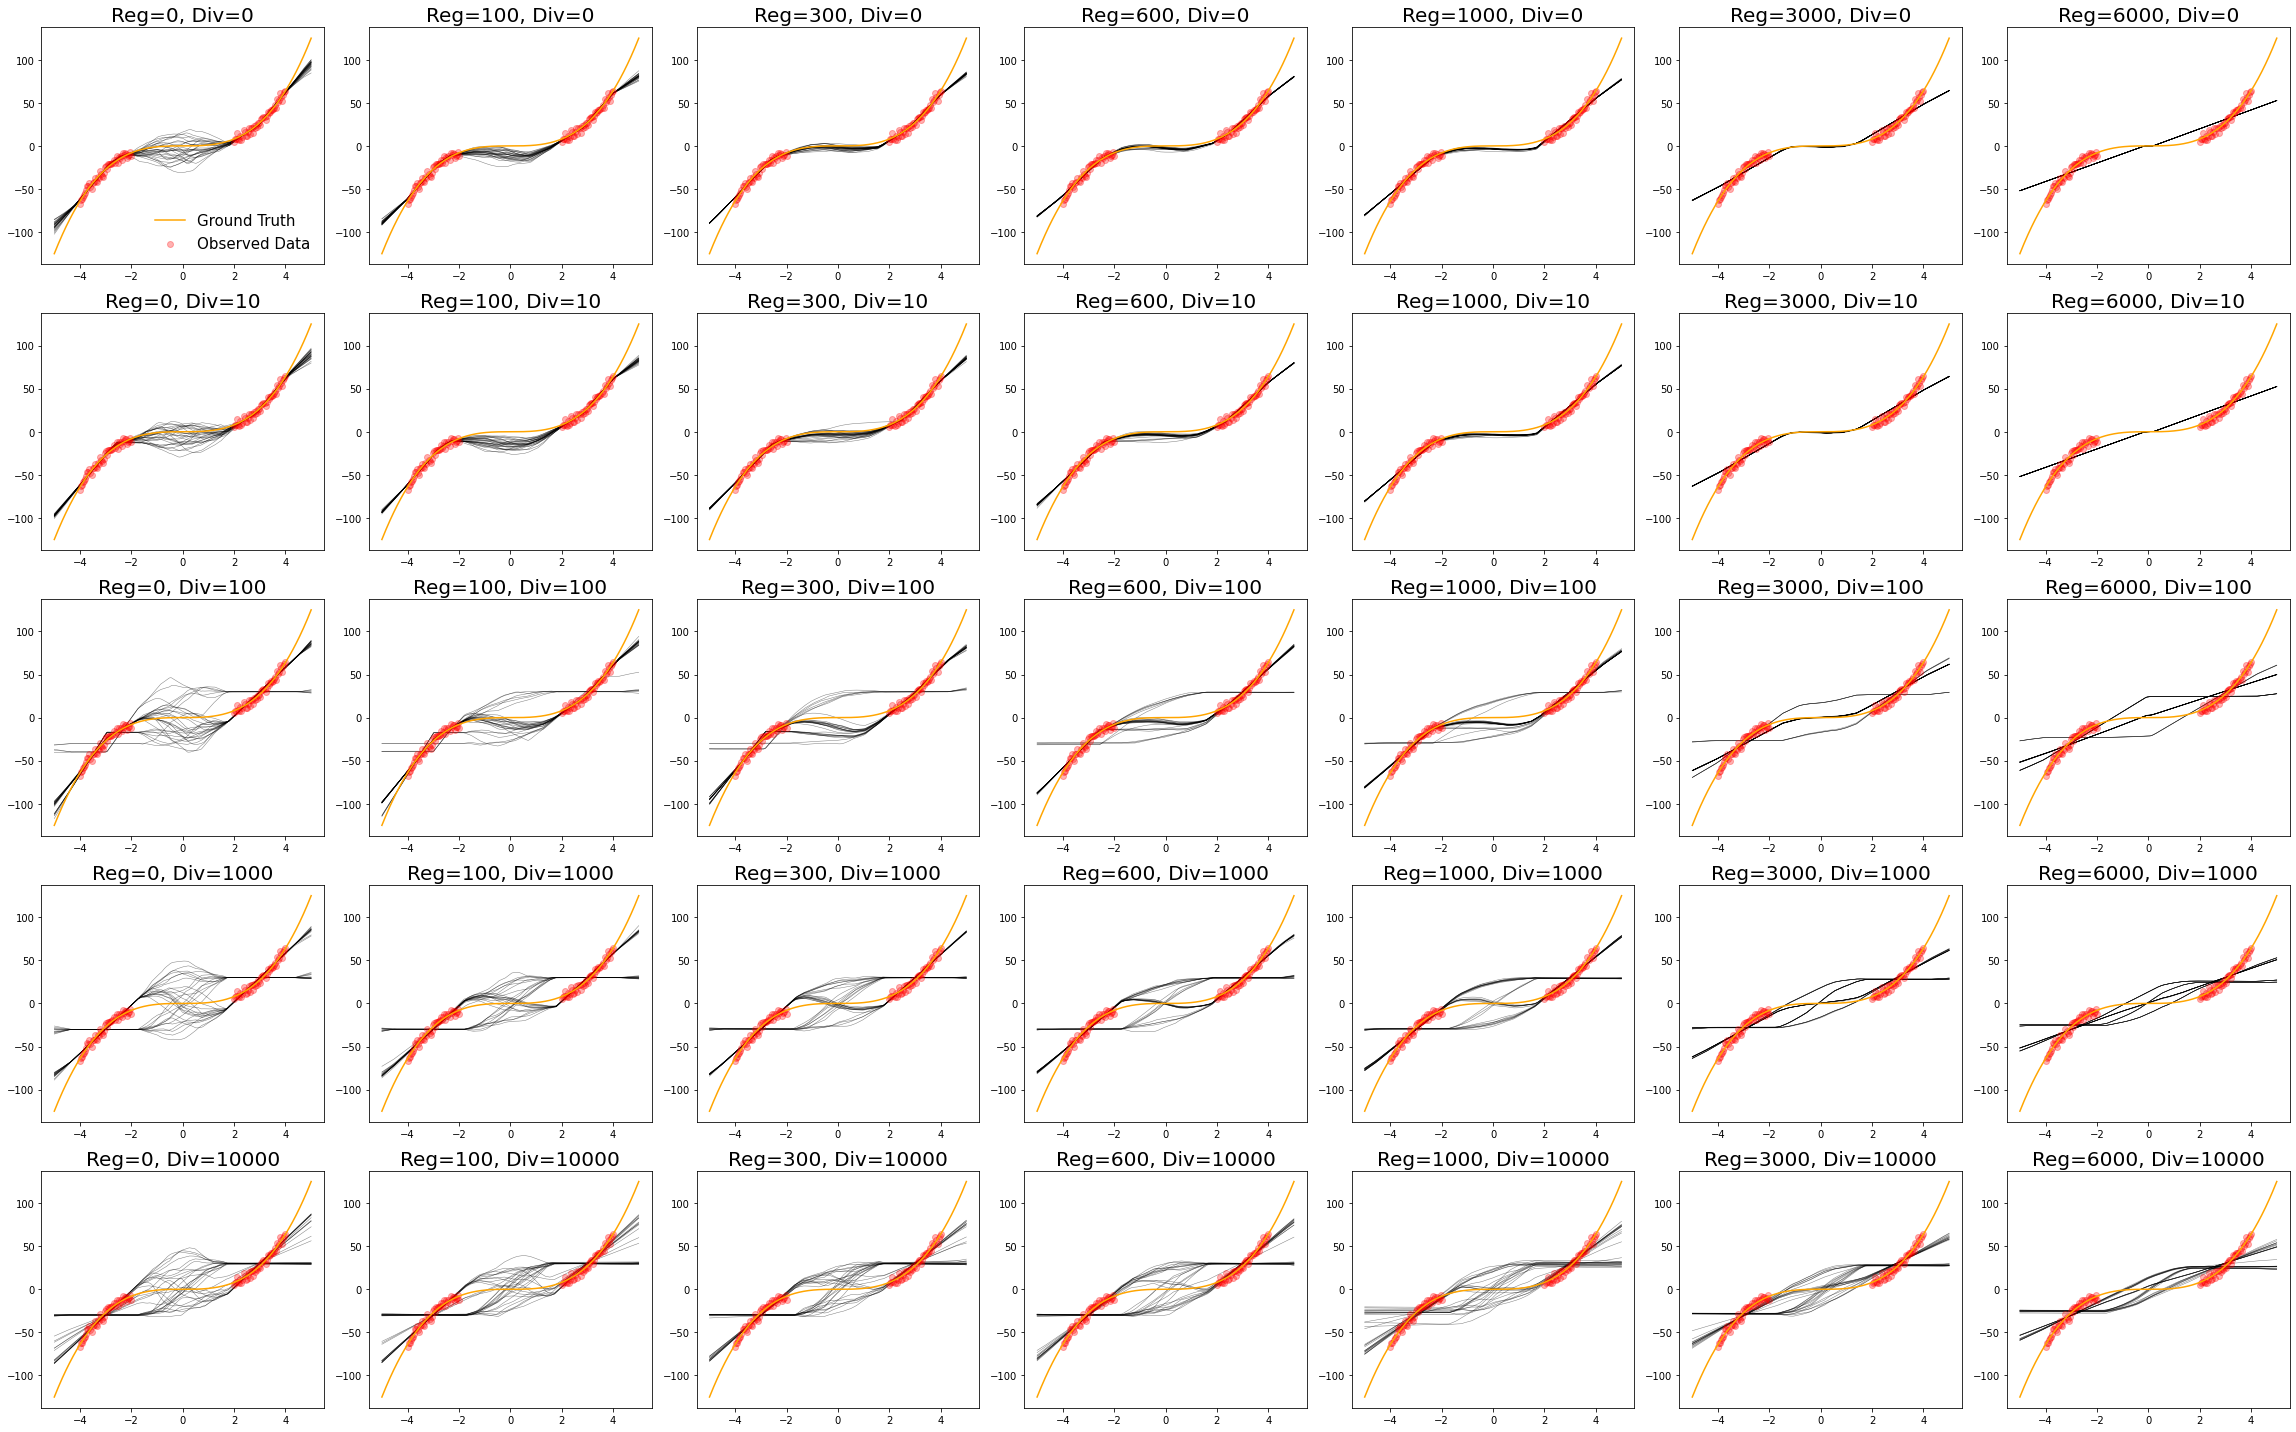

In [34]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
#     ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize = 20)
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
        handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'aux_funcs_30_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot prior samples

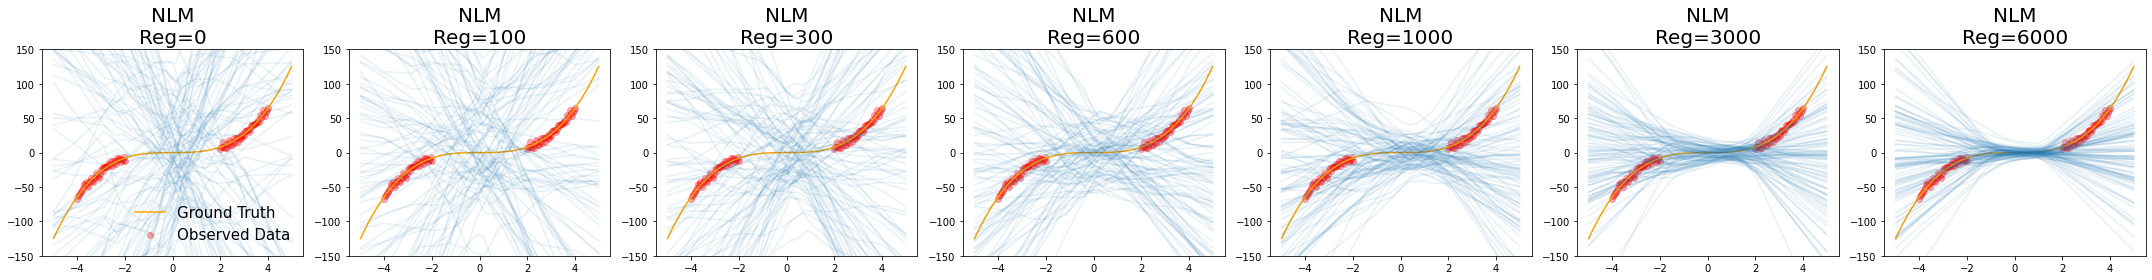

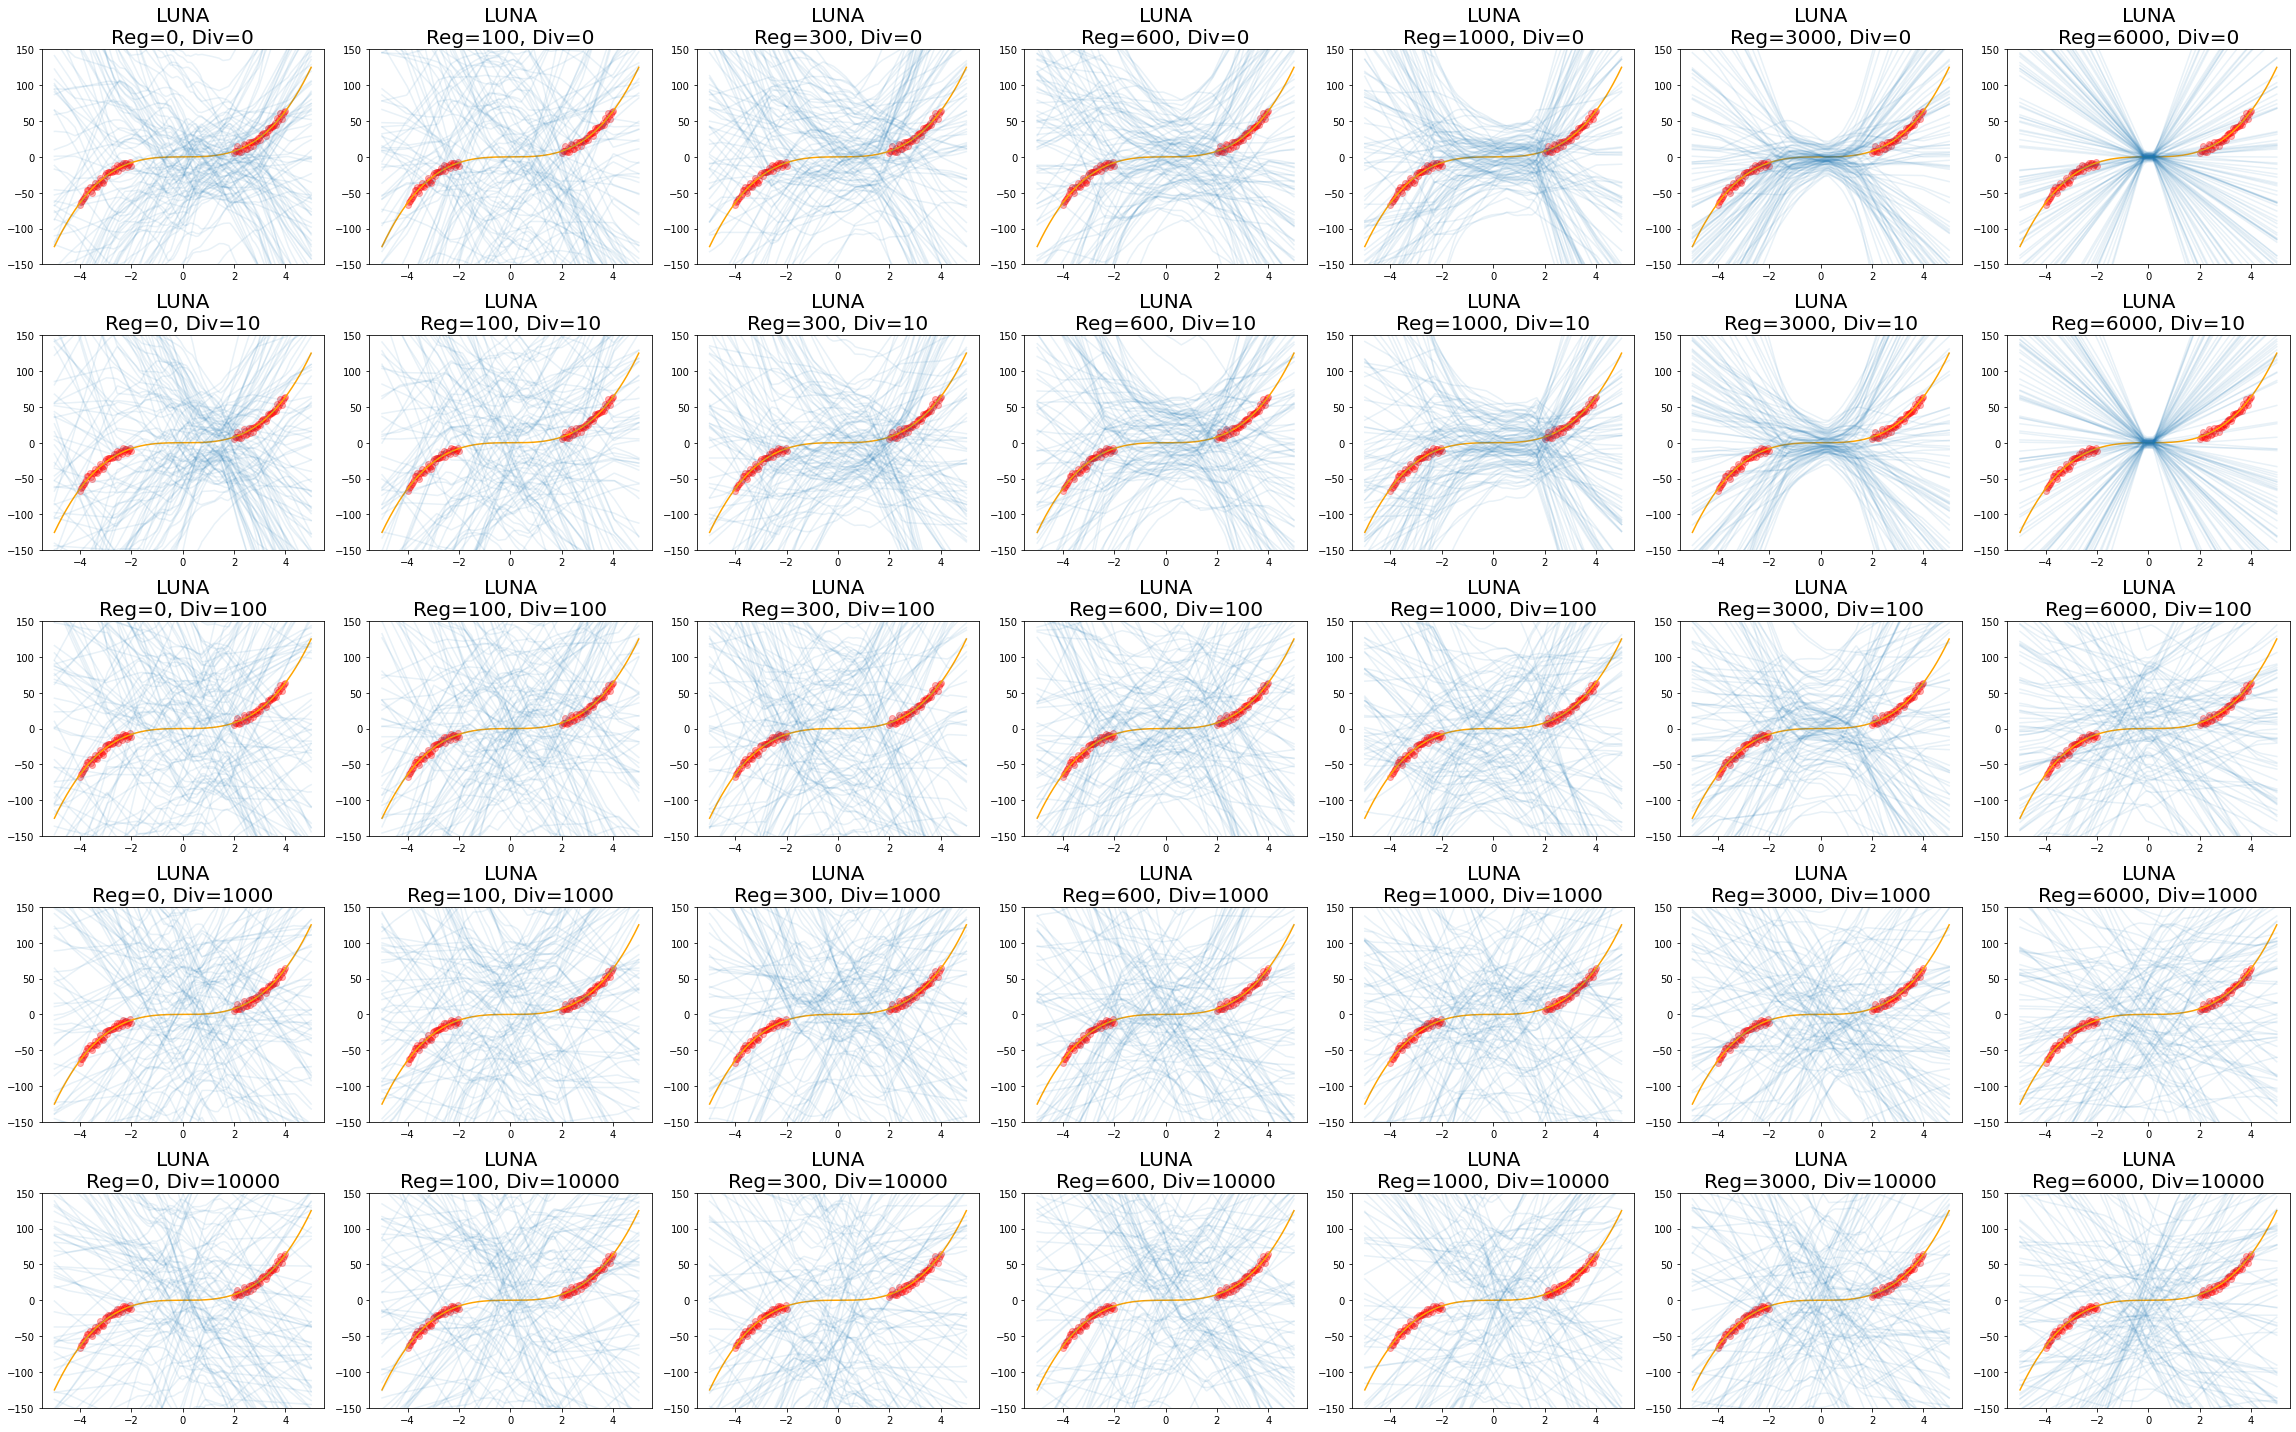

In [28]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_NLM_30_aux_2000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_LUNA_30_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior samples

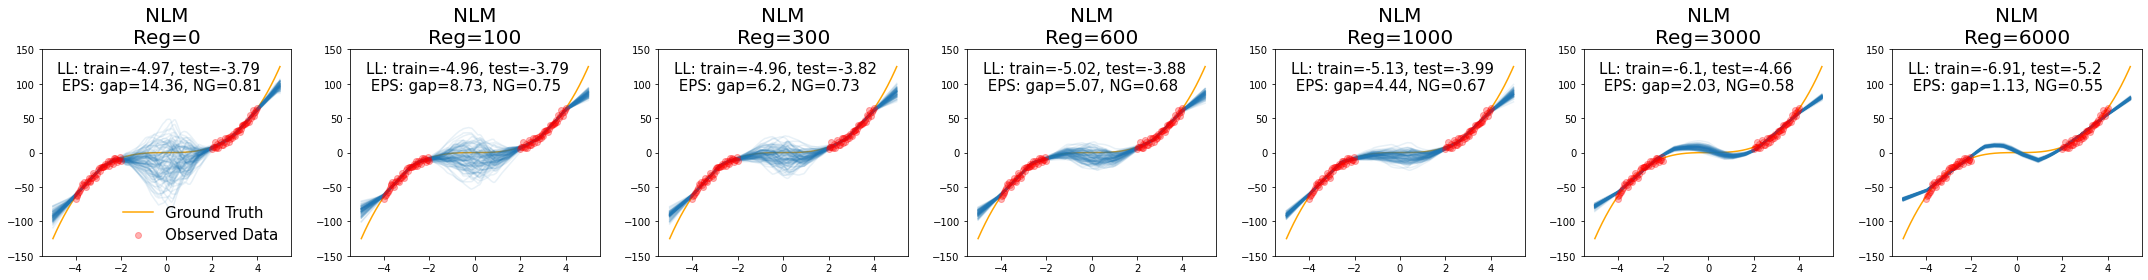

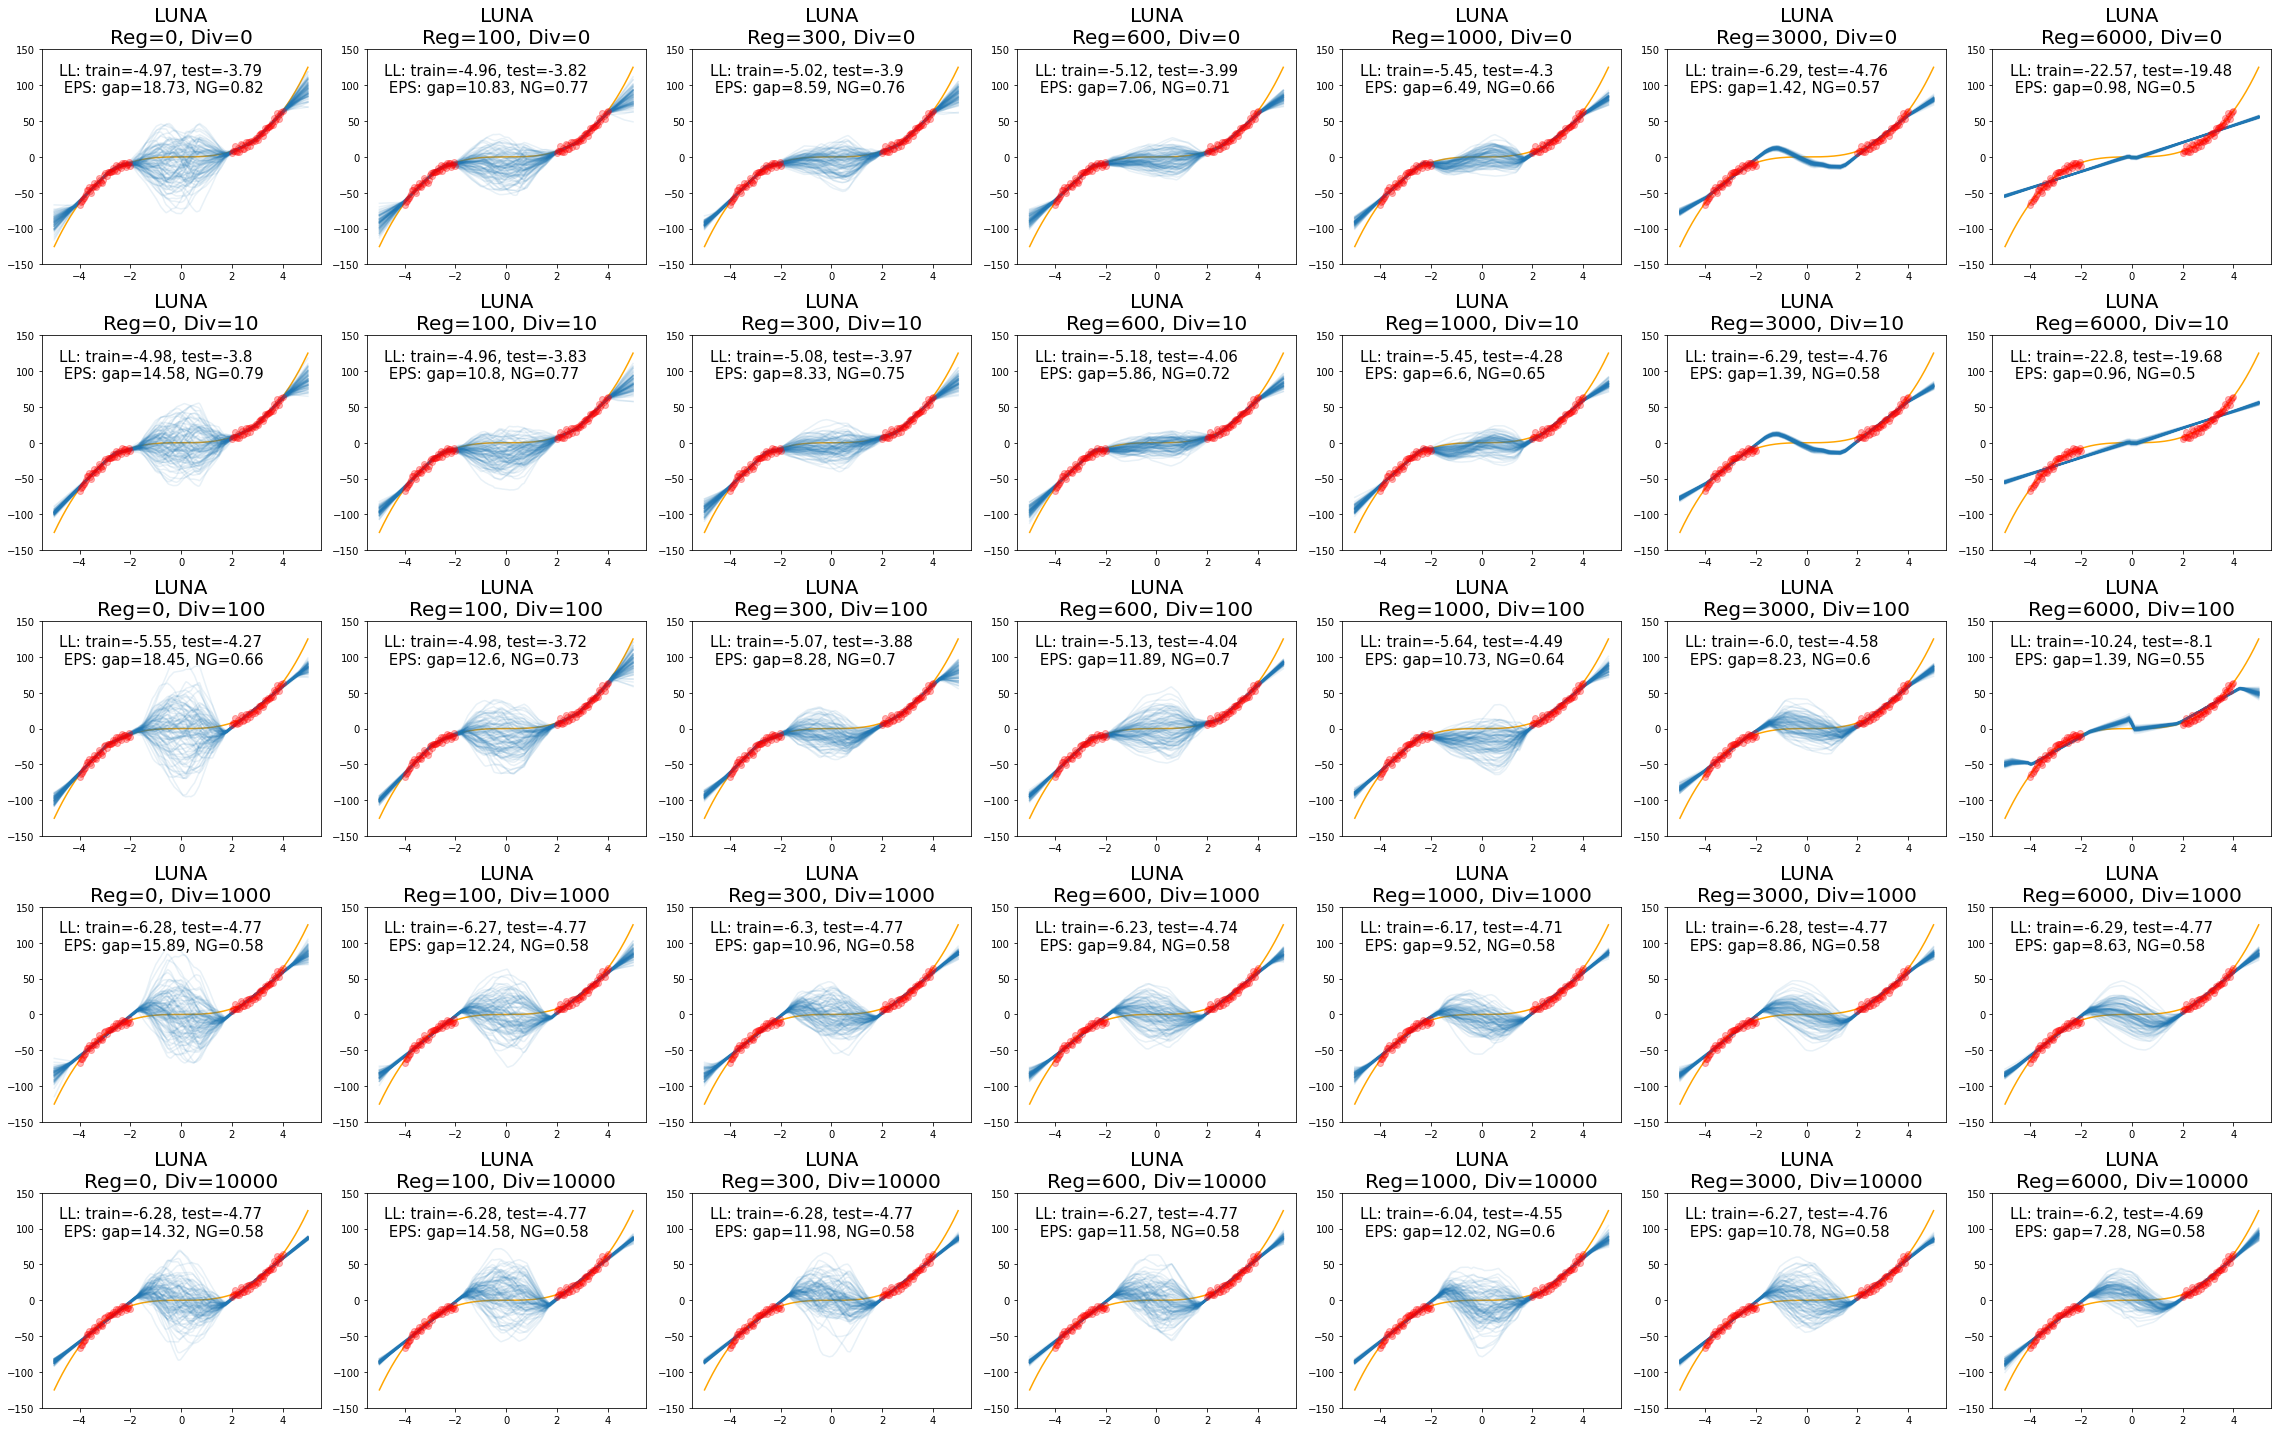

In [29]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
#     ax.set_title(f"NLM\nReg={reg_grid[i]}\nLL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}",fontsize=20)

    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_NLM_30_aux_2000_steps.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     ax.set_title(f"LUNA\nReg={luna.params['reg_param']}, Div={luna.params['lambda_in']}\nLL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_LUNA_30_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

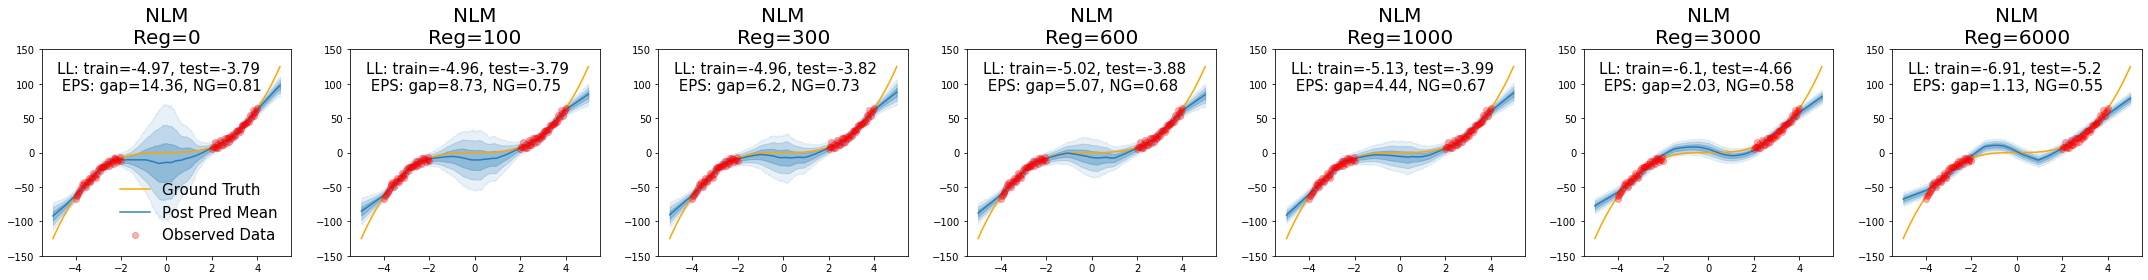

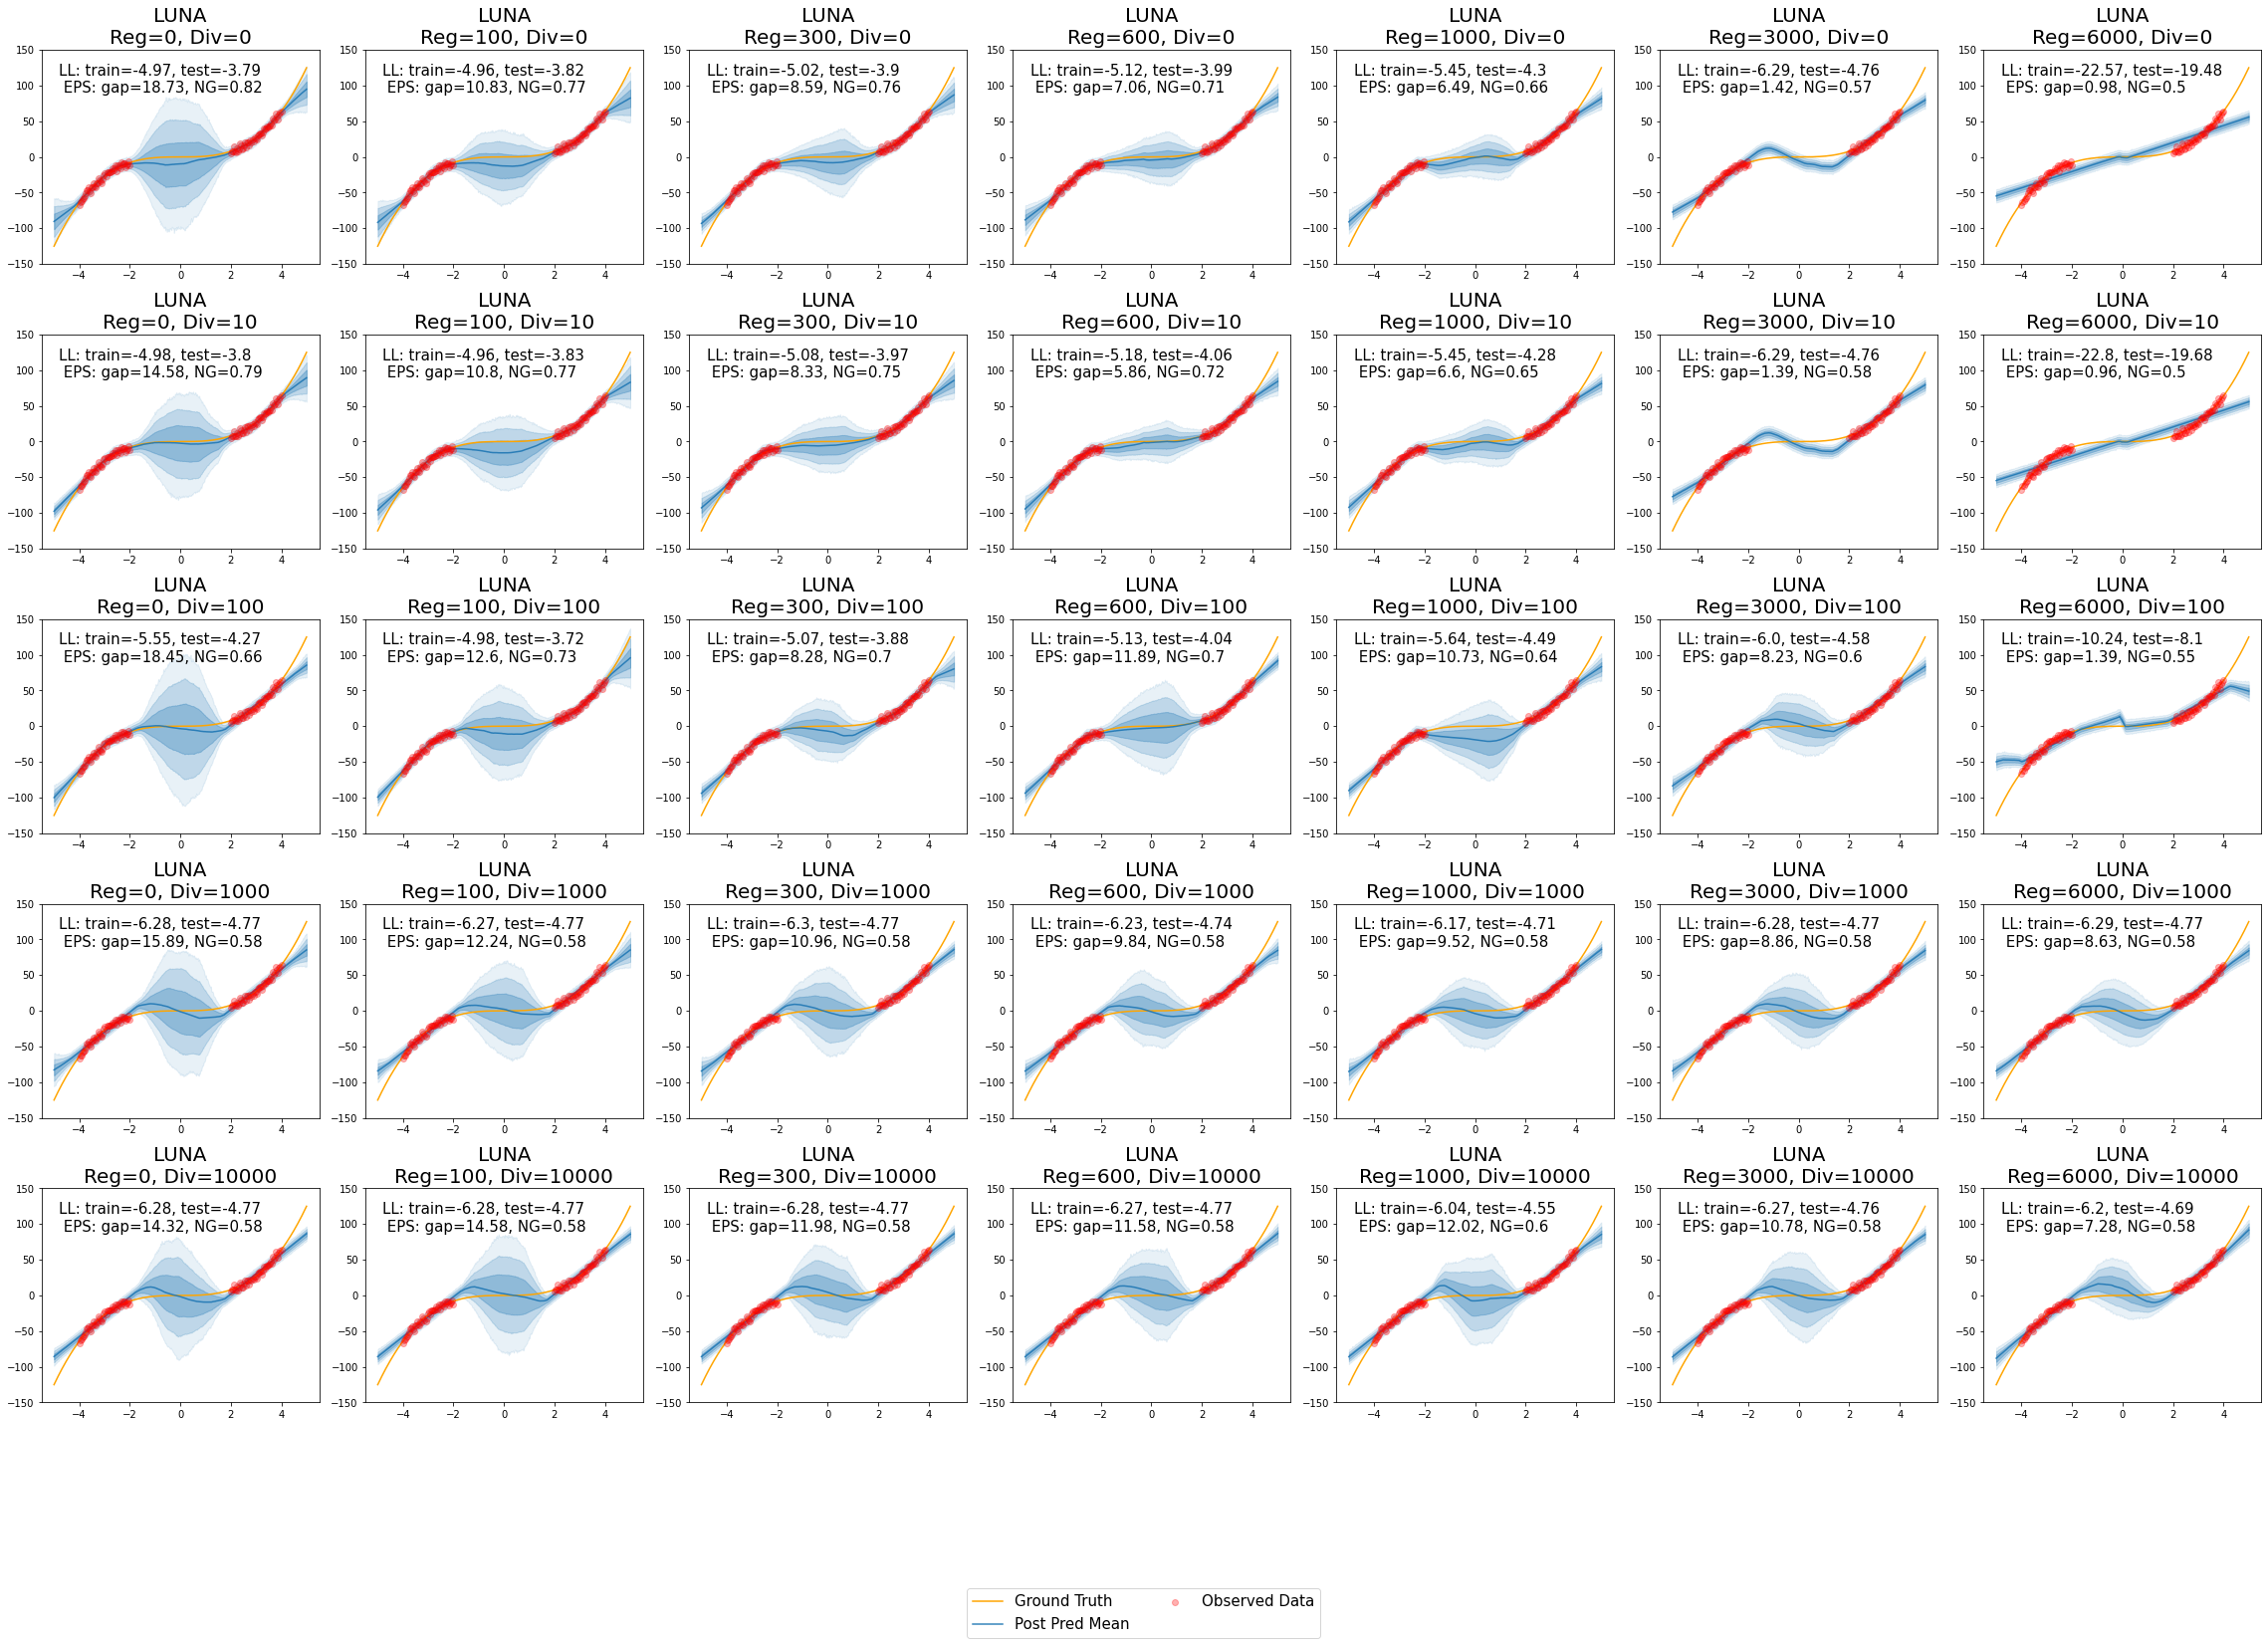

In [46]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)

#     ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=20)

#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_NLM_30_aux_2000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)

#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
fig.legend(handles, labels, loc='lower center', ncol=2,fontsize = 15,bbox_to_anchor=(0.25, -0.15, 0.5, 0.5))
plt.tight_layout()
plt.savefig(imagePath+'PPI_LUNA_30_aux_2000_steps.png',dpi = 150)
plt.show()



## Evaluate model performance (log likelihood) and epistemic uncertainty

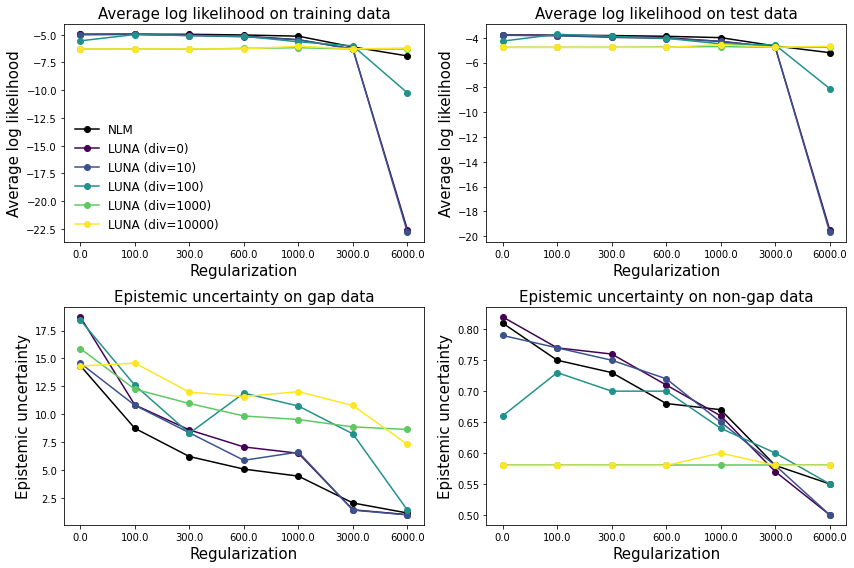

In [47]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,0].set_ylim([-23,-3])
axes[0,0].legend(frameon=False,fontsize = 12)
# handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,1].set_ylim([-23,-3])
# axes[0,1].legend(frameon=False)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,0].set_ylim([0,22])
# axes[1,0].legend(frameon=False)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,1].set_ylim([0,22])
# axes[1,1].legend(frameon=False)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

# fig.legend(handles, labels, loc='lower center', ncol=2,fontsize = 15,bbox_to_anchor=(0.25, -0.15, 0.5, 0.5))
plt.tight_layout()
plt.savefig(imagePath+'evaluation_30_aux_2000_steps.png',dpi = 150)
plt.show()

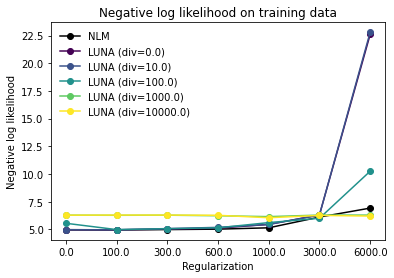

In [13]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

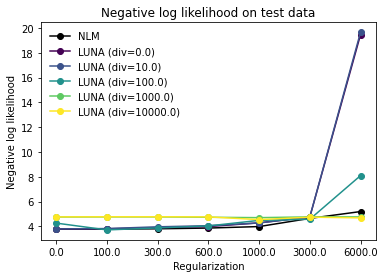

In [14]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

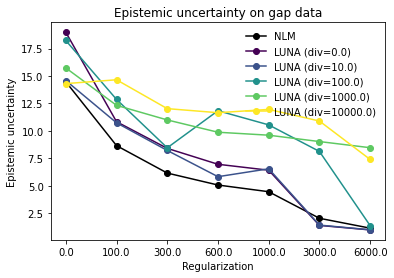

In [15]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

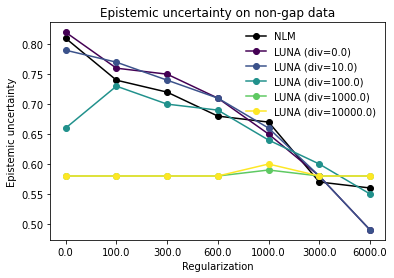

In [16]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()